# **Lab 2: Avocado Prices**

## **Data Set-up**

**0. Import the data and declare your package dependencies.**

In [2]:
import pandas as pd
import numpy as np
from plotnine import *

In [3]:
df = pd.read_csv('C:/Users/Fernando Fonseca/Documents/Cal_Poly/Grad_school/Fall/GSB_544/Data/avocado-updated-2020.csv')

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33040,2020-11-29,1.47,1583056.27,67544.48,97996.46,2617.17,1414878.10,906711.52,480191.83,27974.75,organic,2020,Total U.S.
33041,2020-11-29,0.91,5811114.22,1352877.53,589061.83,19741.90,3790665.29,2197611.02,1531530.14,61524.13,conventional,2020,West
33042,2020-11-29,1.48,289961.27,13273.75,19341.09,636.51,256709.92,122606.21,134103.71,0.00,organic,2020,West
33043,2020-11-29,0.67,822818.75,234688.01,80205.15,10543.63,497381.96,285764.11,210808.02,809.83,conventional,2020,West Tex/New Mexico


**1. Briefly describe the data set. What information does it contain?**

this data set is looking at avocado sales based on the type of avocado as well as the region it was sold. It contains 14 columns of which include:


*   Index
*   date: Date of the observation
*   average_price: The average Price of a single Avocado
*   total_volume: Total number of Avocados sold
*   4046: Total number of avocados with PLU 4046 (small/medium Hass Avocados) sold
*   4225: Total number of avocados with PLU 4225 (large Hass Avocados) sold
*   4770: Total number of avocados with PLU 4770 (extra large Hass Avocados) sold
*   total_bags: Total number of bags sold
*   small_bags: Small Bags sold
*   large_bags: Large bags sold
*   xlarge_bags: Extra LArge bags sold
*   type: Type of avocado (organic or conventional)
*   year: The Year of the observation
*   geography: region, state, city, or other geographical region of the observation

**2. Clean the data in any way you see fit.**


In [4]:
df.rename(columns={'4046': 'small'}, inplace=True)
df.rename(columns={'4225': 'large'}, inplace=True)
df.rename(columns={'4770': 'extra_large'}, inplace=True)

array(['Albany', 'Atlanta', 'Baltimore/Washington', 'Boise', 'Boston',
       'Buffalo/Rochester', 'California', 'Charlotte', 'Chicago',
       'Cincinnati/Dayton', 'Columbus', 'Dallas/Ft. Worth', 'Denver',
       'Detroit', 'Grand Rapids', 'Great Lakes', 'Harrisburg/Scranton',
       'Hartford/Springfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'Las Vegas', 'Los Angeles', 'Louisville', 'Miami/Ft. Lauderdale',
       'Midsouth', 'Nashville', 'New Orleans/Mobile', 'New York',
       'Northeast', 'Northern New England', 'Orlando', 'Philadelphia',
       'Phoenix/Tucson', 'Pittsburgh', 'Plains', 'Portland',
       'Raleigh/Greensboro', 'Richmond/Norfolk', 'Roanoke', 'Sacramento',
       'San Diego', 'San Francisco', 'Seattle', 'South Carolina',
       'South Central', 'Southeast', 'Spokane', 'St. Louis', 'Syracuse',
       'Tampa', 'Total U.S.', 'West', 'West Tex/New Mexico'], dtype=object)

In [5]:
df['total_US'] = (df['geography'] == 'Total U.S.')
df['region'] = df['geography'].isin(['Great Lakes', 'Midsouth', 'Northeast', 'Plains', 'South Central', 'Southeast', 'West', 'Northern New England'])
df['state'] = df['geography'].isin(['California','South Carolina'])
df['metro_areas'] = df['geography'].isin(['Baltimore/Washington', 'Buffalo/Rochester', 'Cincinnati/Dayton', 'Dallas/Ft. Worth', 'Harrisburg/Scranton','Hartford/Springfield',
                                          'Miami/Ft. Lauderdale', 'New Orleans/Mobile', 'Phoenix/Tucson', 'Raleigh/Greensboro', 'Richmond/Norfolk', 'West Tex/New Mexico'])
df['cities'] = df['geography'].isin(['Albany', 'Atlanta','Boise', 'Boston','Charlotte', 'Chicago','Columbus','Denver', 'Detroit', 'Houston', 'Indianapolis',
                                     'Jacksonville','Las Vegas', 'Los Angeles', 'Louisville', 'Nashville', 'New York', 'Orlando', 'Philadelphia', 'Pittsburgh','Portland',
                                     'Roanoke', 'Sacramento','San Diego', 'San Francisco', 'Seattle','Spokane', 'St. Louis', 'Syracuse', 'Tampa','Grand Rapids'])


,date,average_price,total_volume,small,large,extra_large,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,total_US,region,state,metro_areas,cities
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany,False,False,False,False,True
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,Albany,False,False,False,False,True
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta,False,False,False,False,True
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta,False,False,False,False,True
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33040,2020-11-29,1.47,1583056.27,67544.48,97996.46,2617.17,1414878.10,906711.52,480191.83,27974.75,organic,2020,Total U.S.,True,False,False,False,False
33041,2020-11-29,0.91,5811114.22,1352877.53,589061.83,19741.90,3790665.29,2197611.02,1531530.14,61524.13,conventional,2020,West,False,True,False,False,False
33042,2020-11-29,1.48,289961.27,13273.75,19341.09,636.51,256709.92,122606.21,134103.71,0.00,organic,2020,West,False,True,False,False,False
33043,2020-11-29,0.67,822818.75,234688.01,80205.15,10543.63,497381.96,285764.11,210808.02,809.83,conventional,2020,West Tex/New Mexico,False,False,False,True,False


## **Exercises**
**3. Which major geographical region sold the most total organic, small Hass avocados in 2017?**

The major geographical region that sold the most total organic, small hass avocados in 2017 is the West.

In [6]:
region_organic = df[(df['region'] == True) & (df['type'] == 'organic') & (df['year'] == 2017)]


answer_3 = region_organic[['small', 'geography']].groupby('geography').sum()
answer_3.sort_values(by='small', ascending=False)


,small
geography,
West,1870206.29
South Central,1717104.19
Northeast,925832.36
Southeast,285124.34
Great Lakes,202487.68
Midsouth,186395.50
Plains,168583.40
Northern New England,1249.48


**4. Split the date variable into month, day, and year variables. In which month is the highest average volume of avocado sales?**

The month with the highest average volume of avocado sales is May

In [7]:
df['date'] = pd.to_datetime(df['date'])

df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

answer_4 = df[['total_volume', 'month']].groupby('month').mean()
answer_4.sort_values(by='total_volume', ascending=False)

,total_volume
month,
5,1.123632e+06
2,1.095374e+06
6,1.051247e+06
4,1.016582e+06
3,9.957150e+05
1,9.853122e+05
7,9.832681e+05
8,9.499249e+05
9,9.064773e+05


**5. Which metro area geographical regions sold the most total avocados? Plot side-by-side box-plots of the total volume for only the five metro geographical regions with the highest averages for the total_volume variable**

The metro area that sold the most total avocados is Dallas/ Ft. Worth



                       total_volume
geography                          
Dallas/Ft. Worth      712751.896814
Phoenix/Tucson        625038.257500
West Tex/New Mexico   460774.328900
Baltimore/Washington  452229.794281
Miami/Ft. Lauderdale  378668.053399


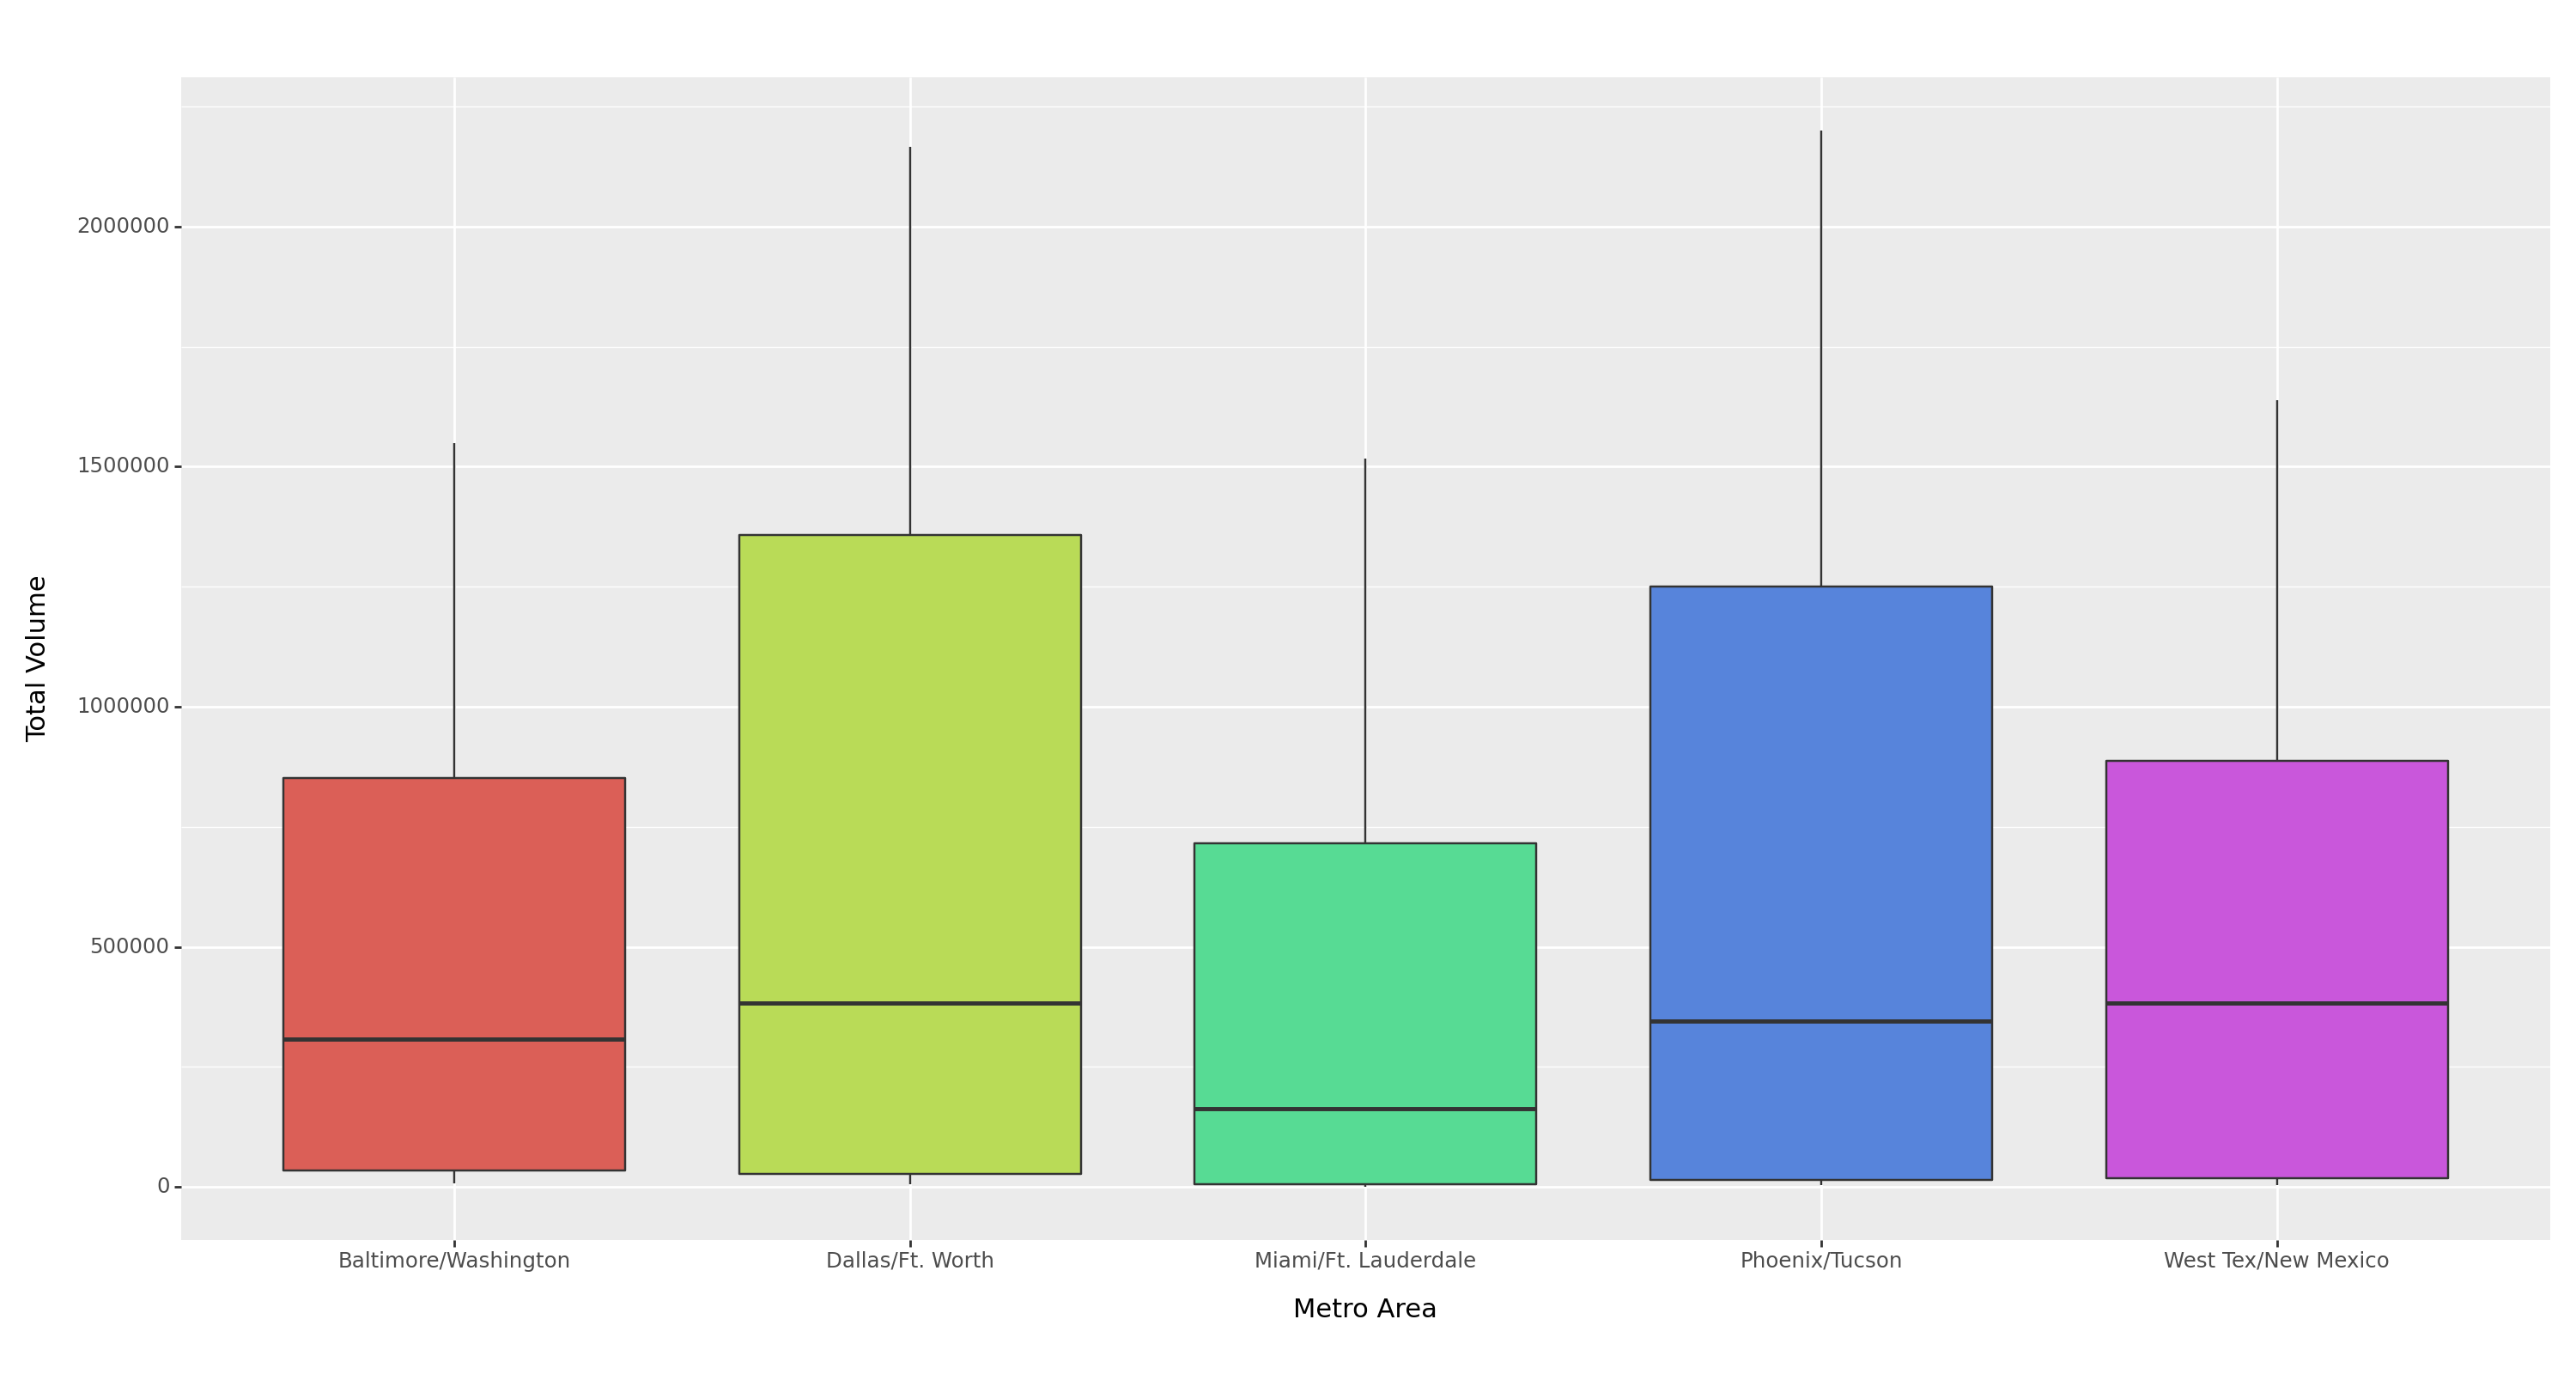

<Figure Size: (1500 x 800)>

In [8]:
metro_areas = df[df['metro_areas'] == True]

answer_5 = metro_areas[['total_volume','geography']].groupby('geography').mean()
print(answer_5.sort_values(by='total_volume', ascending = False).head(5))

top_5 = df[(df['geography'] == 'Dallas/Ft. Worth') | (df['geography'] == 'Phoenix/Tucson') |(df['geography'] == 'West Tex/New Mexico') |(df['geography'] == 'Baltimore/Washington') |(df['geography'] == 'Miami/Ft. Lauderdale')]

plot_5 = (ggplot(top_5, aes('geography', 'total_volume', fill = 'geography'))
      + geom_boxplot()
      + xlab('Metro Area')
      + ylab ('Total Volume')
      + theme (figure_size= (15,8), legend_position= 'none')
)
plot_5

## **Pivoting**

**6. From your cleaned data set, create a data set with only these California regions and answer the following questions about these California regions only.**

The following four California geographical regions are in this data set: "Los Angeles", "San Diego", "Sacramento", and "San Francisco".

In [9]:
california = df[(df['geography'] == 'Los Angeles') | (df['geography'] == 'San Diego') | (df['geography'] == 'Sacramento') | (df['geography'] == 'San Francisco')]

**7. In which California regions is the price of organic versus conventional avocados most different? Support your answer with a few summary statistics AND a visualization.**

The California region with the greatest difference in organic vs conventional avocados is San Francisco, with the mean difference for the observations being 72 cents. We can also look at total difference, by adding the difference from all observations, as well as the median for each in order to compare them. We can see that when comparing the median difference, San Diego has the highest, but given the margins and total difference as well, i would still give the edge to San Francisco as the greatest difference.

       geography  mean difference
3  San Francisco         0.718954
2      San Diego         0.684510
1     Sacramento         0.578497
0    Los Angeles         0.527778
       geography  median difference
2      San Diego              0.710
3  San Francisco              0.670
1     Sacramento              0.580
0    Los Angeles              0.565


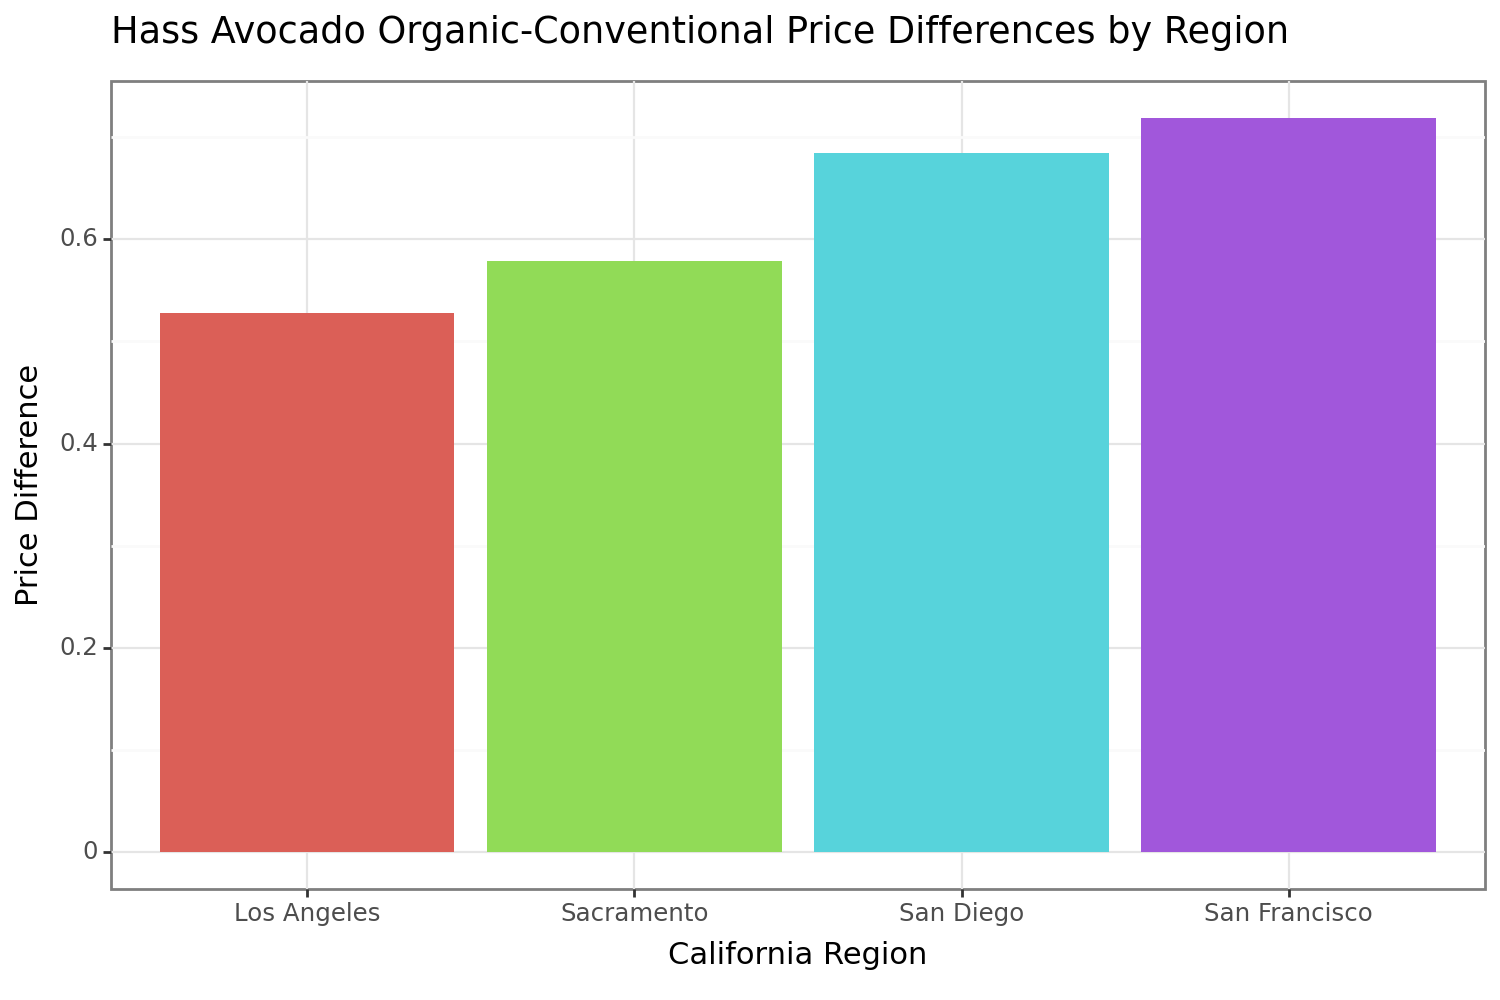

<Figure Size: (750 x 500)>

In [15]:
california_7 = california[['average_price', 'type', 'geography']]
california_7_organic = california_7[california_7['type'] == 'organic']
california_7_conventional = california_7[california_7['type'] == 'conventional']

# finding the average prices and then their difference
organic = california_7_organic[['average_price','geography']].groupby('geography').mean().reset_index()
conventional = california_7_conventional[['average_price','geography']].groupby('geography').mean().reset_index()


org_conv = conventional.merge(organic, on=['geography'], suffixes = ('_conventional', '_organic'))

org_conv['difference'] = org_conv['average_price_organic'] - org_conv['average_price_conventional']

mean_diff_sorted = org_conv.sort_values(by='difference', ascending = False)

mean_diff_sorted = mean_diff_sorted.rename(columns={'difference': 'mean difference'})
print(mean_diff_sorted[['geography', 'mean difference']])

# finding the median prices and then their difference
org_median = california_7_organic[['average_price','geography']].groupby('geography').median().reset_index()
conv_median = california_7_conventional[['average_price','geography']].groupby('geography').median().reset_index()

answer_7 = conv_median.merge(org_median, on=['geography'], suffixes = ('_conventional', '_organic'))

answer_7['difference'] = answer_7['average_price_organic'] - answer_7['average_price_conventional']

diff_med_sorted = answer_7.sort_values(by='difference', ascending = False)

diff_med_sorted = diff_med_sorted.rename(columns={'difference': 'median difference'})

print(diff_med_sorted[['geography', 'median difference']])

#plotting the mean difference

plot = (ggplot(difference_sorted, aes('geography', 'mean difference', fill = 'geography'))
    + geom_bar(stat='identity')
    + labs (x='California Region', y= 'Price Difference', title= 'Hass Avocado Organic-Conventional Price Differences by Region')
    + theme_bw()
    + theme(figure_size = (7.5,5), legend_position= 'none')
    )
plot


**8. The following plot shows, for all four California regions, the proportion of the average Hass avocado sales that are small, large, or extra large; conventional vs. organic. Recreate the plot; you do not have to replicate the exact finishing touches - e.g., color, theme - but your plot should resemble the content of this plot.**

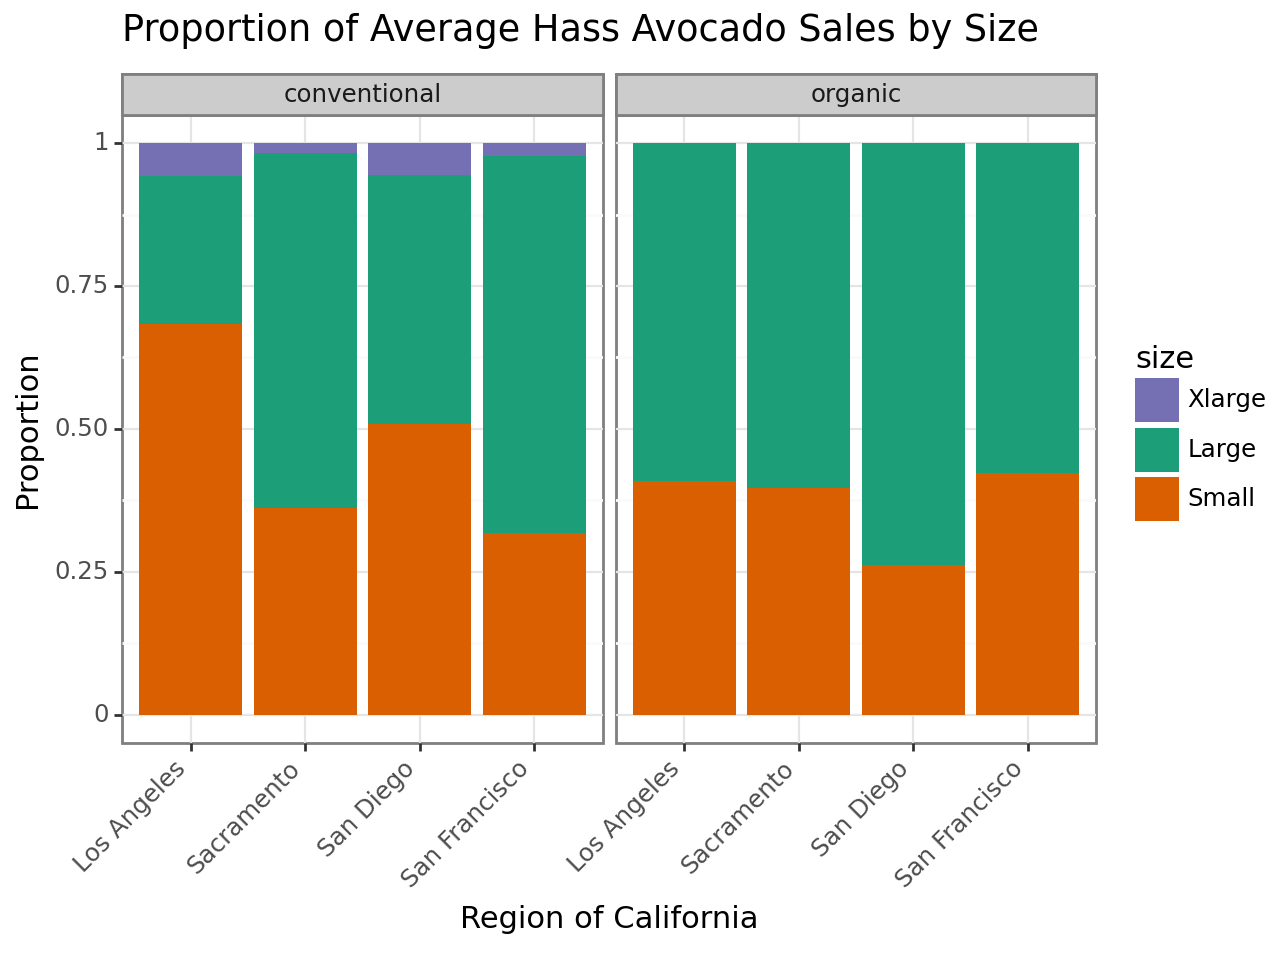

<Figure Size: (640 x 480)>

In [11]:
CA_8 = california[['small','large', 'extra_large', 'type', 'geography']]

long_CA = CA_8.melt(id_vars = ['geography', 'type'], var_name='size', value_name = 'amount')

long_CA.groupby(['geography', 'type', 'size']).sum()

long_CA['total'] = long_CA.groupby(['geography', 'type'])['amount'].transform('sum')

long_CA['proportion'] = long_CA['amount'] / long_CA['total']

plot = (ggplot(long_CA, aes(x='geography', y='proportion', fill='size'))
    + geom_bar(stat='identity', position='stack')
    + facet_wrap('~ type')
    + theme_bw()
    + scale_fill_manual(values={'small': '#d95f01','large': '#1c9e78','extra_large': '#7570b3'}, labels={'small': 'Small', 'large': 'Large', 'extra_large': 'Xlarge'})
    + labs(title='Proportion of Average Hass Avocado Sales by Size',
           y='Proportion', x='Region of California')
    + theme(axis_text_x=element_text(angle=45, hjust=1))
)
plot



## **Using Outside Data**
A joke in the media is that Millennials can’t afford houses, because they spend all their money buying avocado toast. Let’s use this data set to address that claim.

*Find or make a data set with house prices for these four California regions. Join this data set with your California avocado data set.*

*Use your new joined data set to make an argument about the relationship between house prices and avocado prices/sales.*

*Support your argument with a plot.*

## Solution
**Using data from Zillow:**  https://www.zillow.com/research/data/

Reason for selection: I've worked on a project for a real state broker before and they had us use Zillow data. It has the house prices by city by date which is exactly what I wanted.

### About the data
Pre filtered the data on excel power query for the 4 cities we are using and deleted useless columns. Data now includes:

*  City
*  Date
*  ZHVI (Zillow Home Value Index) - A measure of the typical home value and market changes across a given region and housing type. It reflects the typical value for homes in the 35th to 65th percentile range.

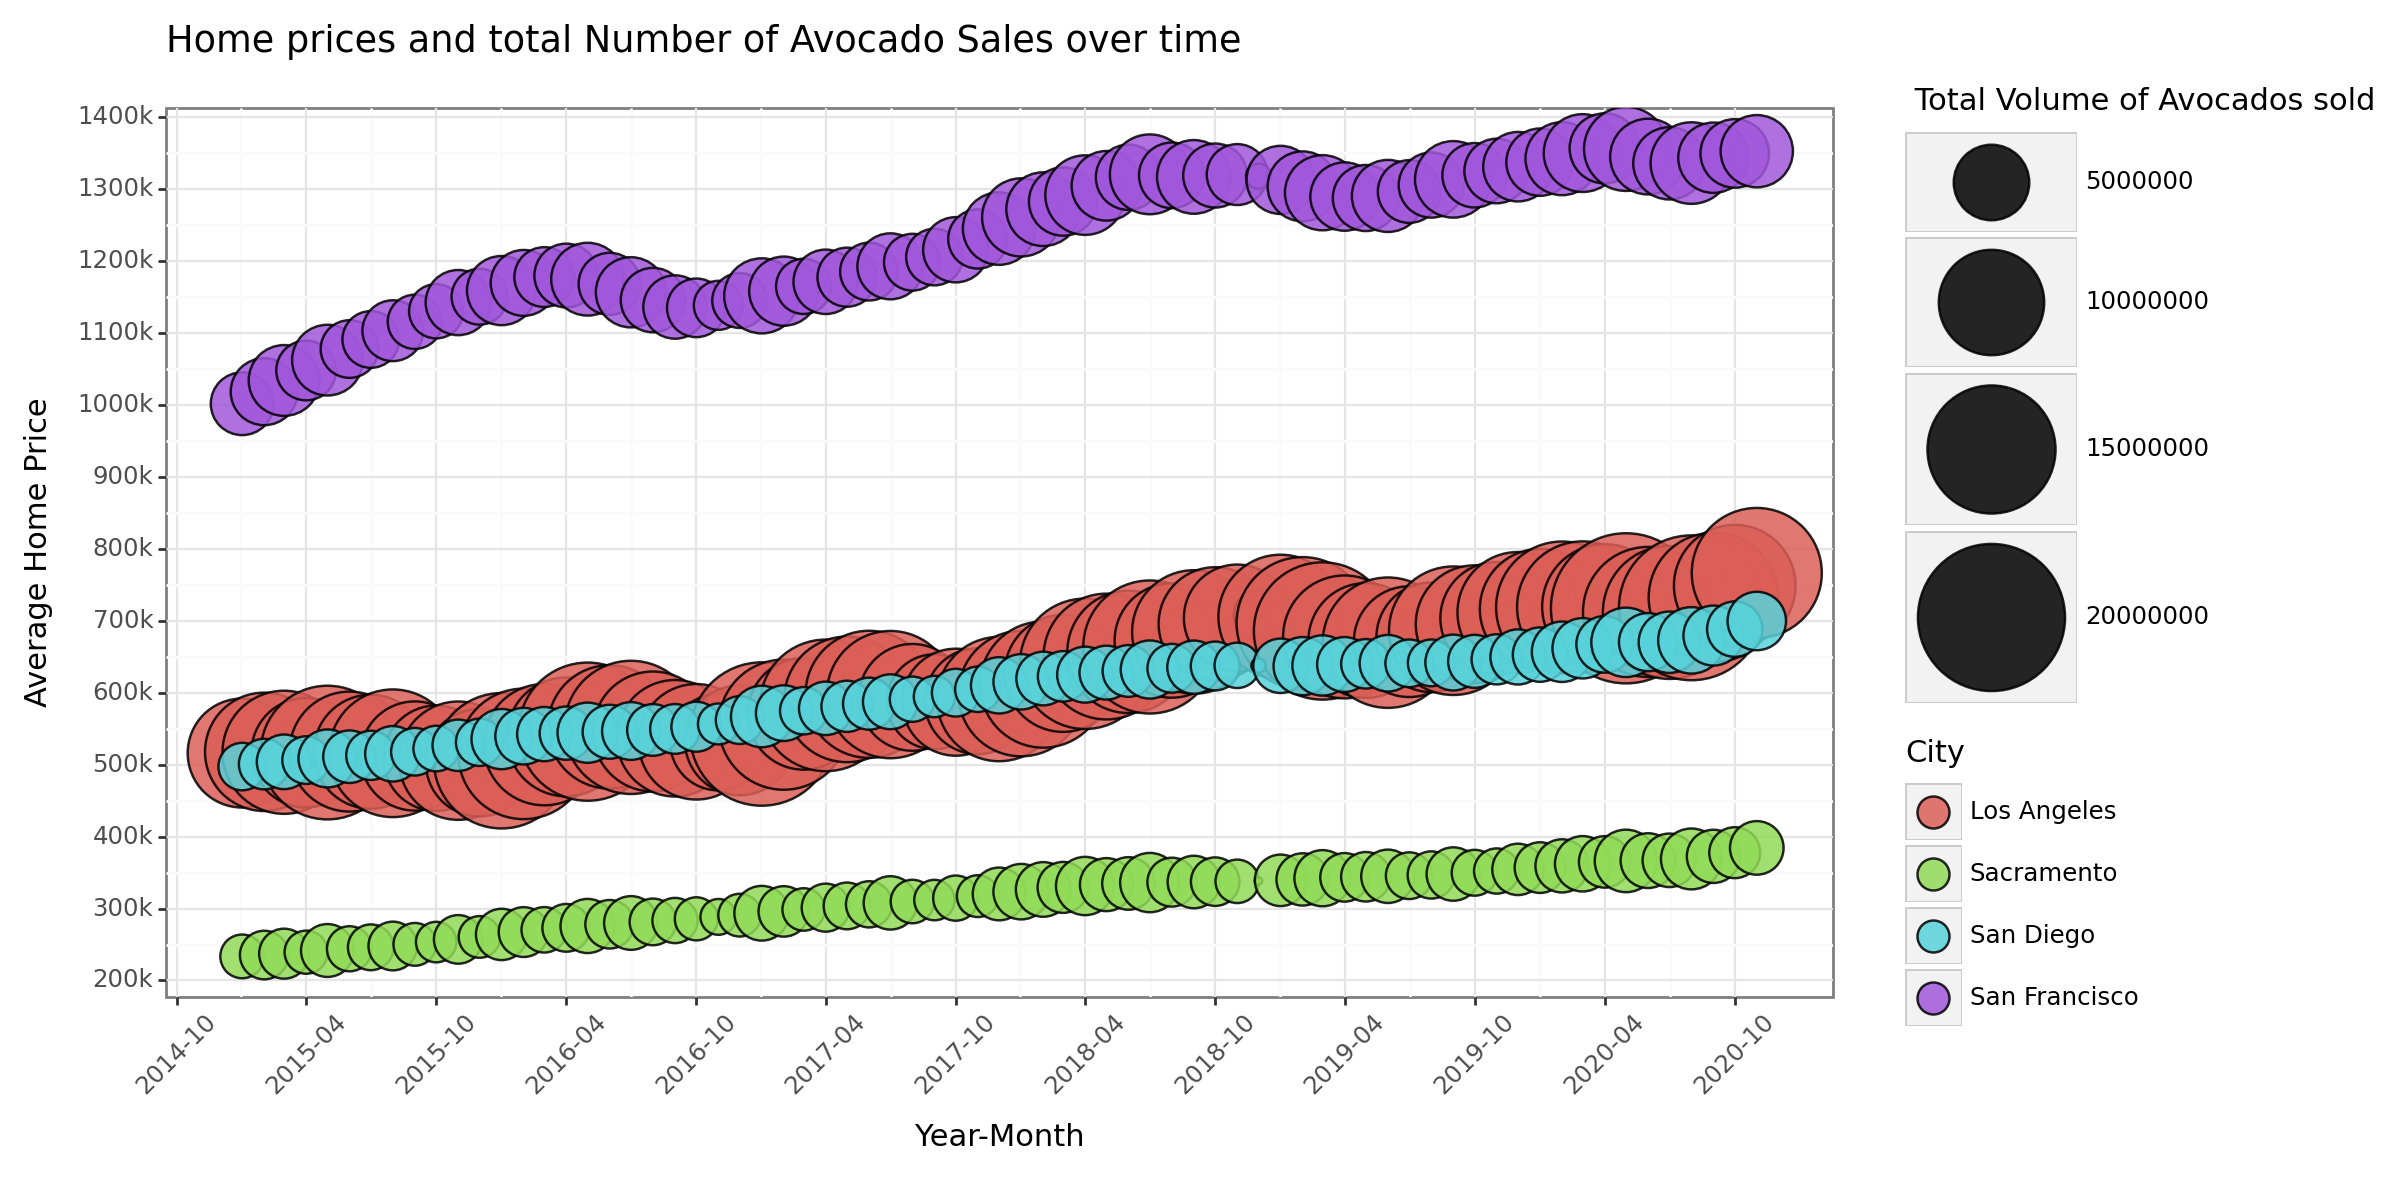

<Figure Size: (1200 x 600)>

In [13]:
housing = pd.read_excel('C:/Users/Fernando Fonseca/Documents/Cal_Poly/Grad_school/Fall/GSB_544/Data/housing data.xlsx')
housing = housing.melt(id_vars=['RegionName'], var_name= 'Date', value_name='ZHVI')

housing['date'] = pd.to_datetime(housing['Date'])
housing['year'] = housing['date'].dt.year
housing['month'] = housing['date'].dt.month
housing = housing[['RegionName', 'ZHVI', 'year', 'month']]
housing = housing.rename(columns={'RegionName': 'City'})

CA_avo = california[['total_volume', 'average_price','type', 'geography','month','year']]
CA_avo = CA_avo.rename(columns={'geography': 'City'})


merged = CA_avo.merge(housing, on=['City', 'month', 'year'] )
merged['date'] = pd.to_datetime(merged[['year', 'month']].assign(DAY=1))


merged_group = merged.groupby(['City', 'date', 'ZHVI']).agg({'average_price': 'mean','total_volume': 'sum'}).reset_index()

breaks = list(range(0, int(merged_group['ZHVI'].max()) + 100000, 100000))
labels = [f"{int(b/1000)}k" for b in breaks]


from mizani.breaks import date_breaks
from mizani.formatters import date_format


plot=(ggplot(merged_group,aes(x='date', y='ZHVI'))
        + geom_point(aes(fill='City', size='total_volume'), na_rm=True, alpha=.85)
        + labs(x='Year-Month', y='Average Home Price', title = 'Home prices and total Number of Avocado Sales over time', size = ' Total Volume of Avocados sold')
        + scale_size(range=(1,30))
        + scale_y_continuous(breaks=breaks, labels=labels)
        + scale_x_date(breaks=date_breaks('6 months'), labels=date_format('%Y-%m'))
        + guides(fill=guide_legend(override_aes={'size': 6}))
        + theme_bw()
        + theme(figure_size=(12, 6),axis_text_x=element_text(angle=45))

)


plot


Through this graph we can see that the total_volume of avocados sold doesn't change very much as the home prices increase over time. So i would conclude that there is not a clear relationship between avocado sales and house prices and this "media joke" is really just a joke.

If we are to compare the regions, we can see that San Francisco has the highest housing prices but the second highest total volume of avocado sales. Los Angeles has the highest Total number of avocado sales, but just the 2nd/3rd highest house prices depending what year you look at it.

Lastly, we can see that both San Diego and Sacramento have the least total volume of avocado sales, with Sacramento having the lowest housing prices by a lot.